# Student Information

**Name:** Aman Singh, Dipanwita Das

**Project Name:** Cooling Load Prediction and Optimization Using ybrid Model

**Register Number:** 23122105, 20122046


# **Access the File From Drive**

In [1]:
# access the drive file

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# **Important Liabraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [7]:
url = "/content/drive/MyDrive/Reinforcement Learning/cat/ENB2012_data.xlsx"
data = pd.read_excel(url)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# **Exploratory Data Analysis**

In [8]:
# Rename columns for clarity
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
                'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution',
                'heating_load', 'cooling_load']

# Drop unnecessary columns based on correlation analysis
data.drop(['surface_area', 'orientation'], axis=1, inplace=True)

# Encode 'glazing_area_distribution' as binary (0 or 1)
data['glazing_area_distribution'] = data['glazing_area_distribution'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

Summary Statistics:
        relative_compactness   wall_area   roof_area  overall_height  \
count            768.000000  768.000000  768.000000       768.00000   
mean               0.764167  318.500000  176.604167         5.25000   
std                0.105777   43.626481   45.165950         1.75114   
min                0.620000  245.000000  110.250000         3.50000   
25%                0.682500  294.000000  140.875000         3.50000   
50%                0.750000  318.500000  183.750000         5.25000   
75%                0.830000  343.000000  220.500000         7.00000   
max                0.980000  416.500000  220.500000         7.00000   

       glazing_area  glazing_area_distribution  heating_load  cooling_load  
count    768.000000                 768.000000    768.000000    768.000000  
mean       0.234375                   0.937500     22.307195     24.587760  
std        0.133221                   0.242219     10.090204      9.513306  
min        0.000000            

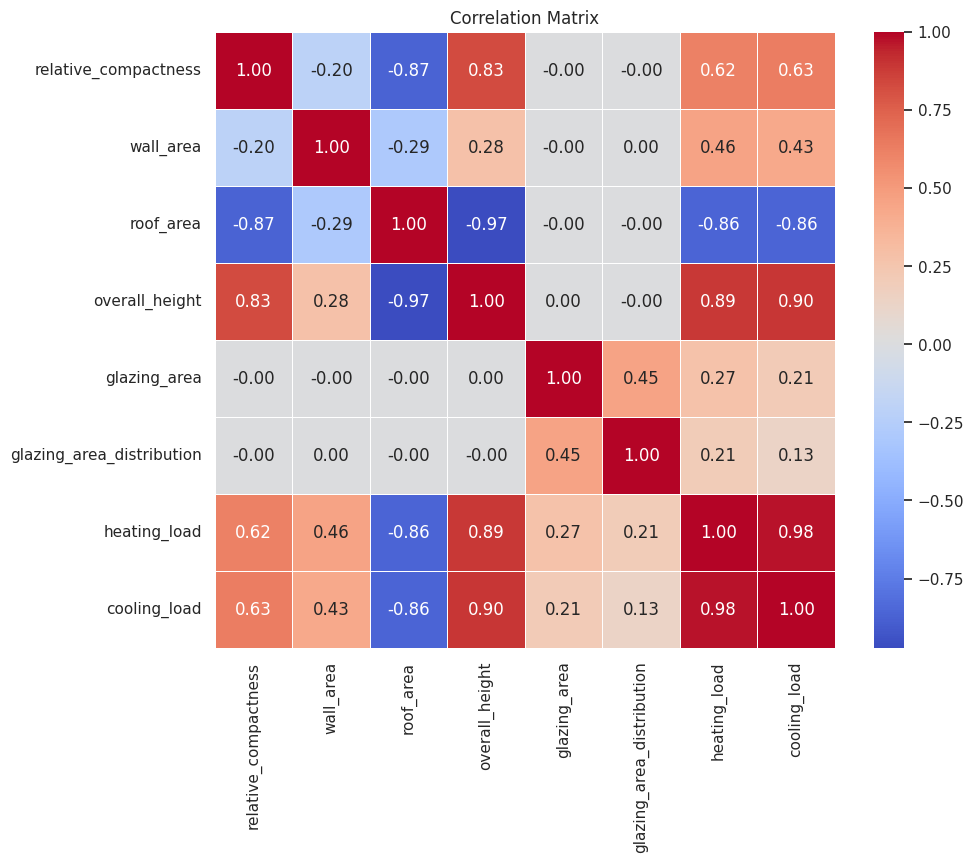

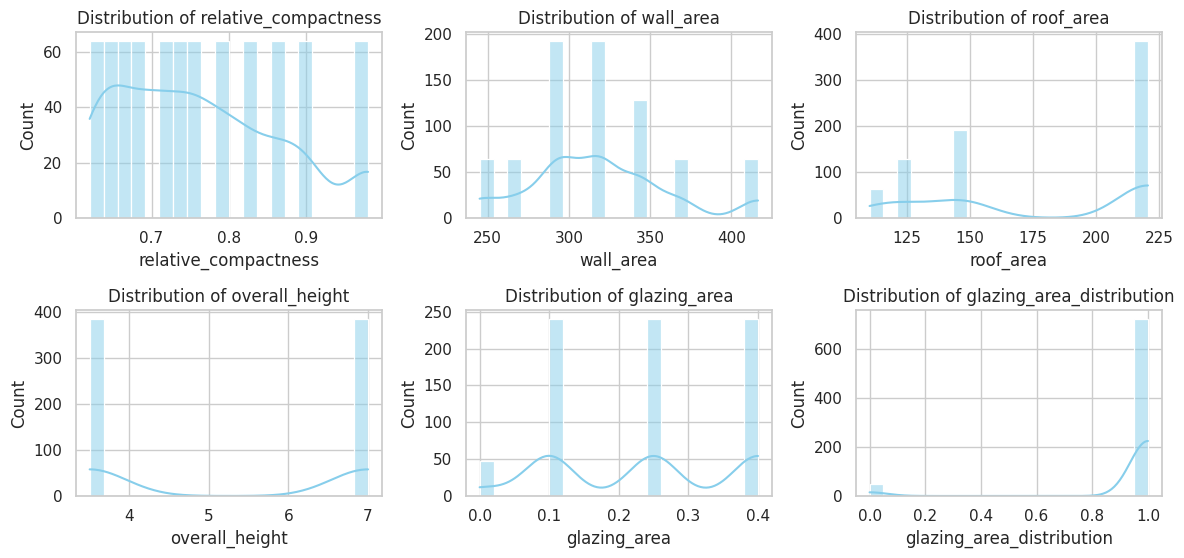

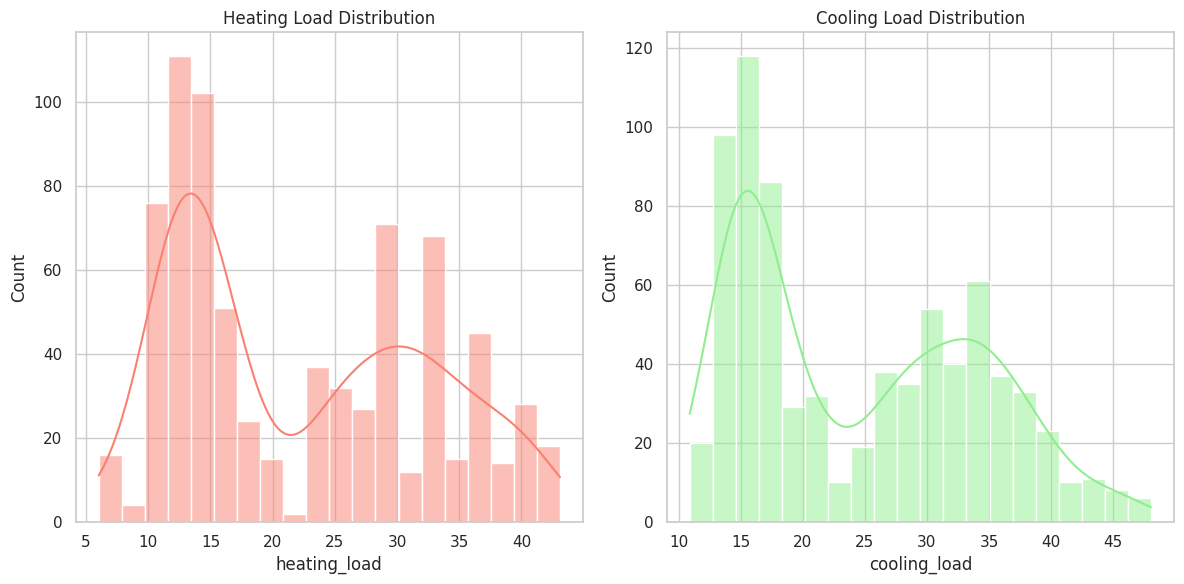

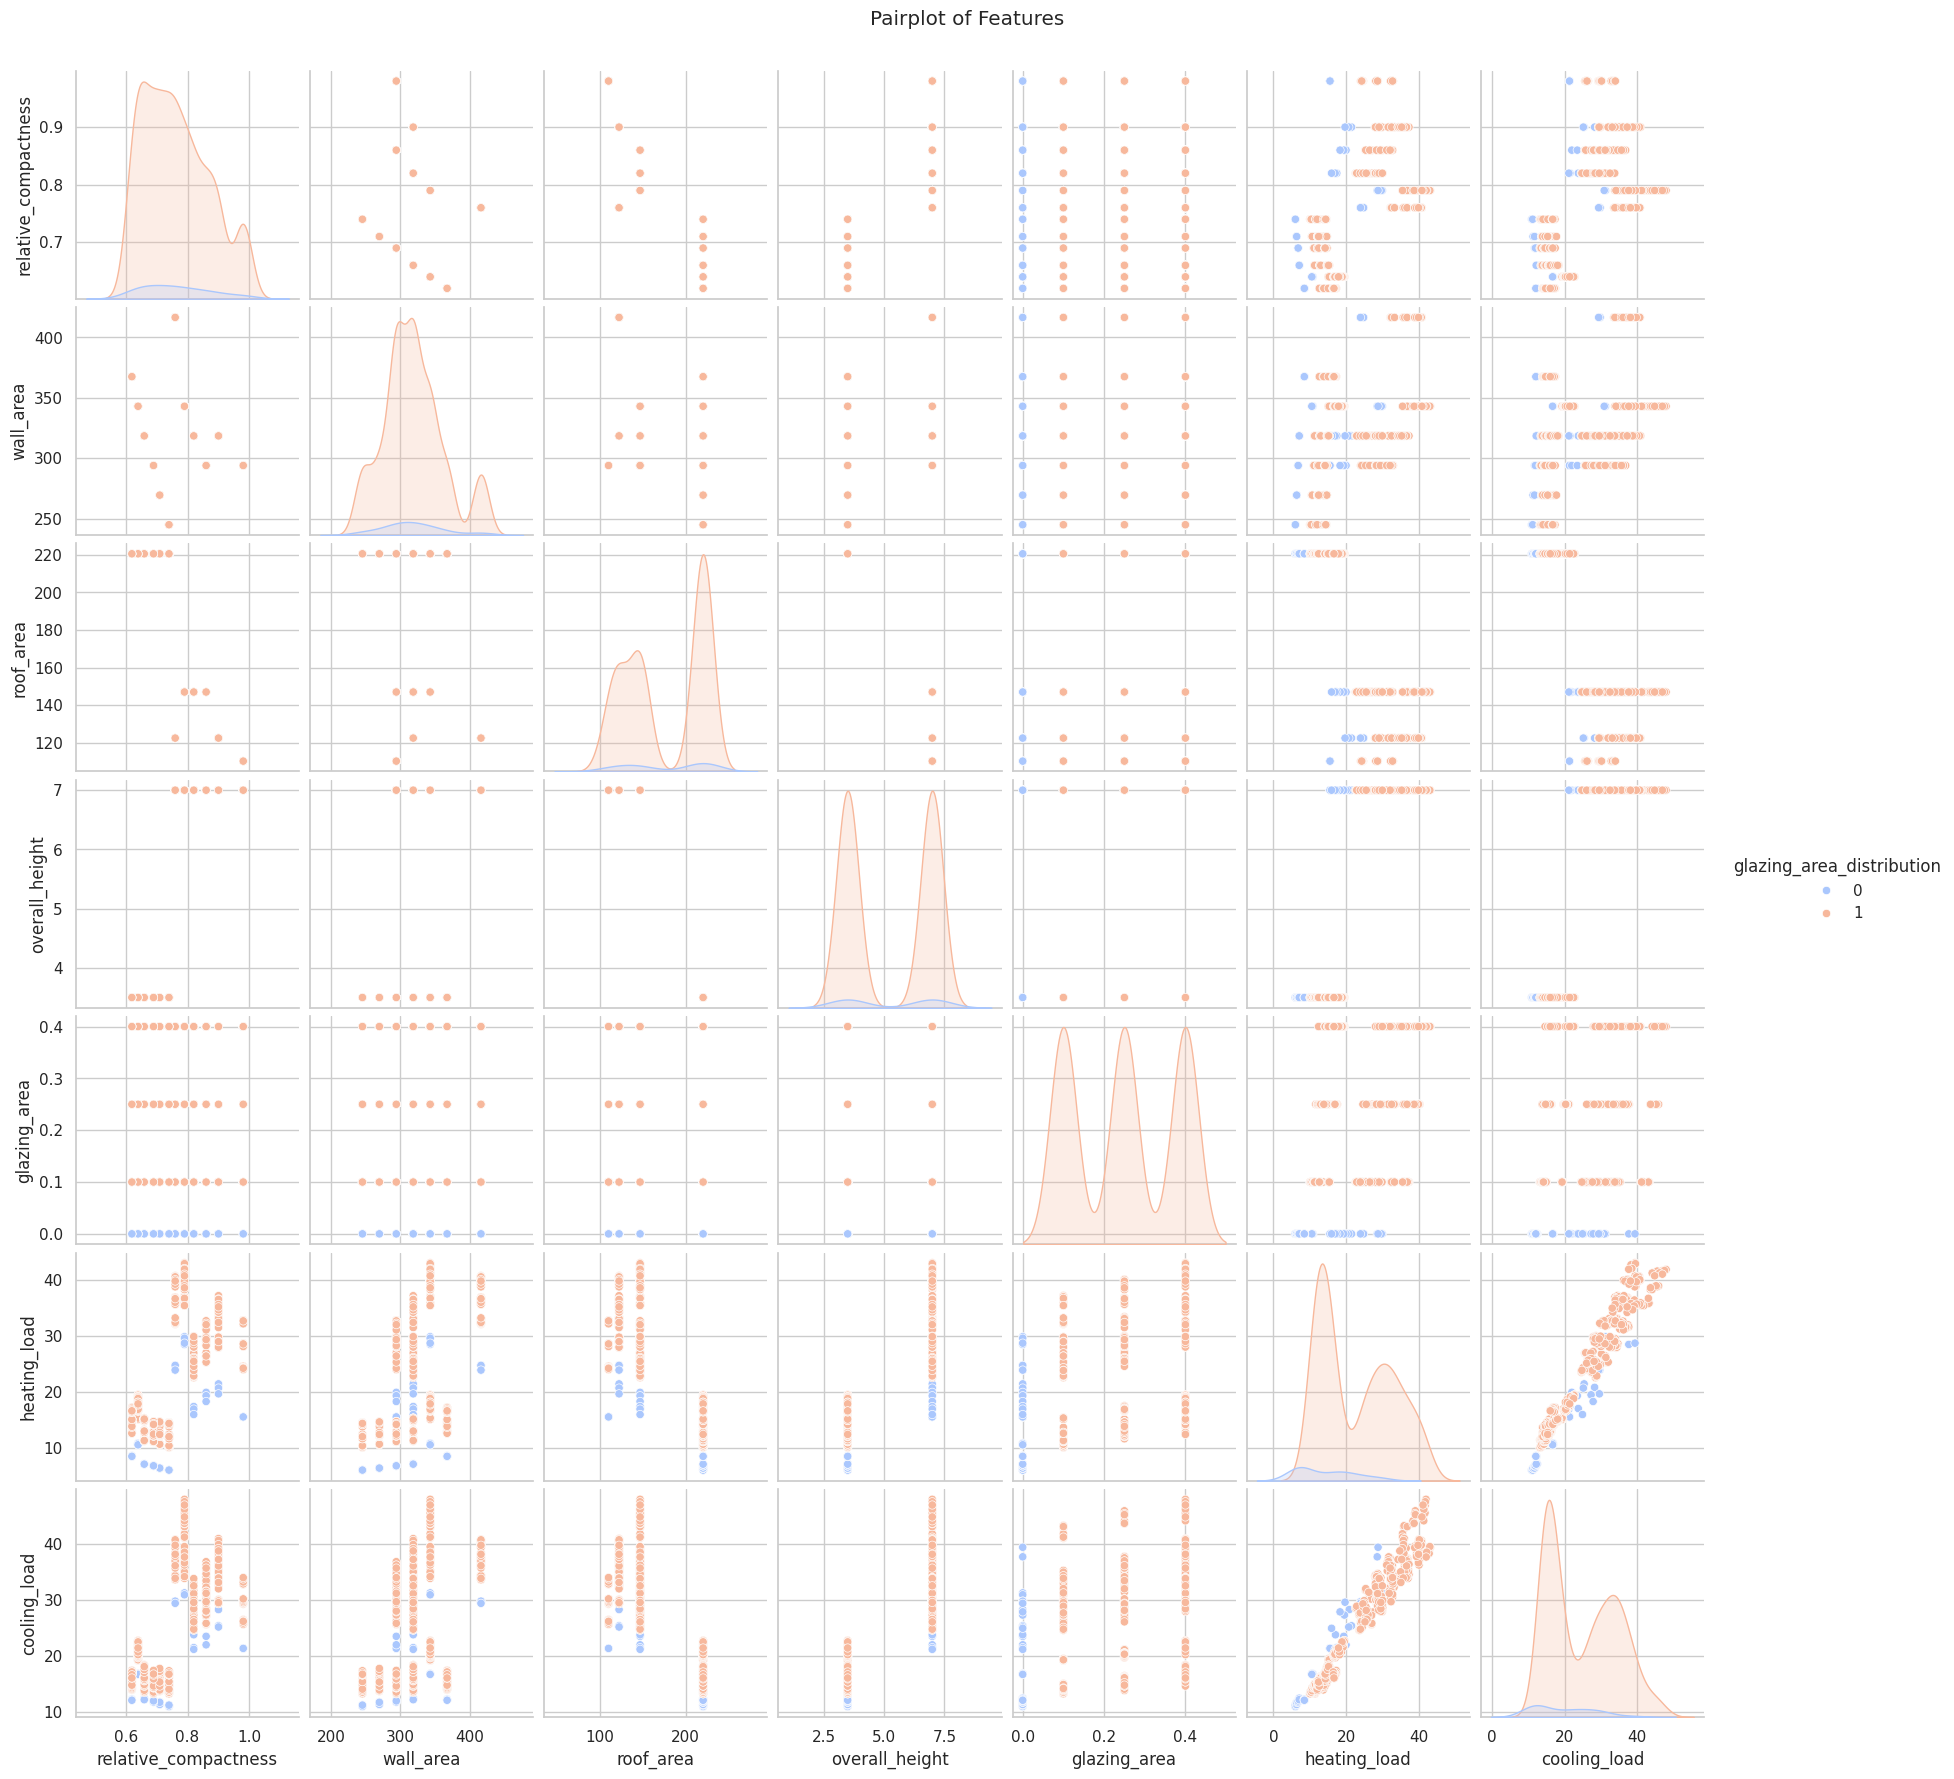

In [10]:
# Import necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Summary Statistics
print("Summary Statistics:\n", data.describe())

# 2. Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 3. Distribution of Features
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for i, feature in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 4. Distribution of Target Variables (heating and cooling loads)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_heating, kde=True, color='salmon', bins=20)
plt.title("Heating Load Distribution")

plt.subplot(1, 2, 2)
sns.histplot(y_cooling, kde=True, color='lightgreen', bins=20)
plt.title("Cooling Load Distribution")

plt.tight_layout()
plt.show()

# 5. Pairplot to visualize relationships between features and targets
# (Optional, can be computationally expensive for large datasets)
sns.pairplot(data, hue='glazing_area_distribution', palette='coolwarm')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()




# **Feature Selection**

In [9]:
# Features (X) and Targets (Y)
X = data.drop(['heating_load', 'cooling_load'], axis=1)
y_heating = data['heating_load']
y_cooling = data['cooling_load']

# Split into training and testing sets
X_train, X_test, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_train_cooling, y_test_cooling = train_test_split(X, y_cooling, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_heating = RandomForestRegressor(random_state=42, n_estimators=100)
rf_heating.fit(X_train, y_train_heating)

rf_cooling = RandomForestRegressor(random_state=42, n_estimators=100)
rf_cooling.fit(X_train, y_train_cooling)

# Predict on test set
y_pred_heating_rf = rf_heating.predict(X_test)
y_pred_cooling_rf = rf_cooling.predict(X_test)

# Evaluate the Random Forest Model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}\n")
    return mse, rmse, mae

print("**Random Forest Regressor Performance**")
mse_heating_rf, rmse_heating_rf, mae_heating_rf = evaluate_model(
    y_test_heating, y_pred_heating_rf, "Heating Load"
)
mse_cooling_rf, rmse_cooling_rf, mae_cooling_rf = evaluate_model(
    y_test_cooling, y_pred_cooling_rf, "Cooling Load"
)


**Random Forest Regressor Performance**
Heating Load Performance:
R² Score: 0.9976
Mean Squared Error (MSE): 0.2503
Root Mean Squared Error (RMSE): 0.5003
Mean Absolute Error (MAE): 0.3744

Cooling Load Performance:
R² Score: 0.9669
Mean Squared Error (MSE): 3.0623
Root Mean Squared Error (RMSE): 1.7500
Mean Absolute Error (MAE): 1.1703



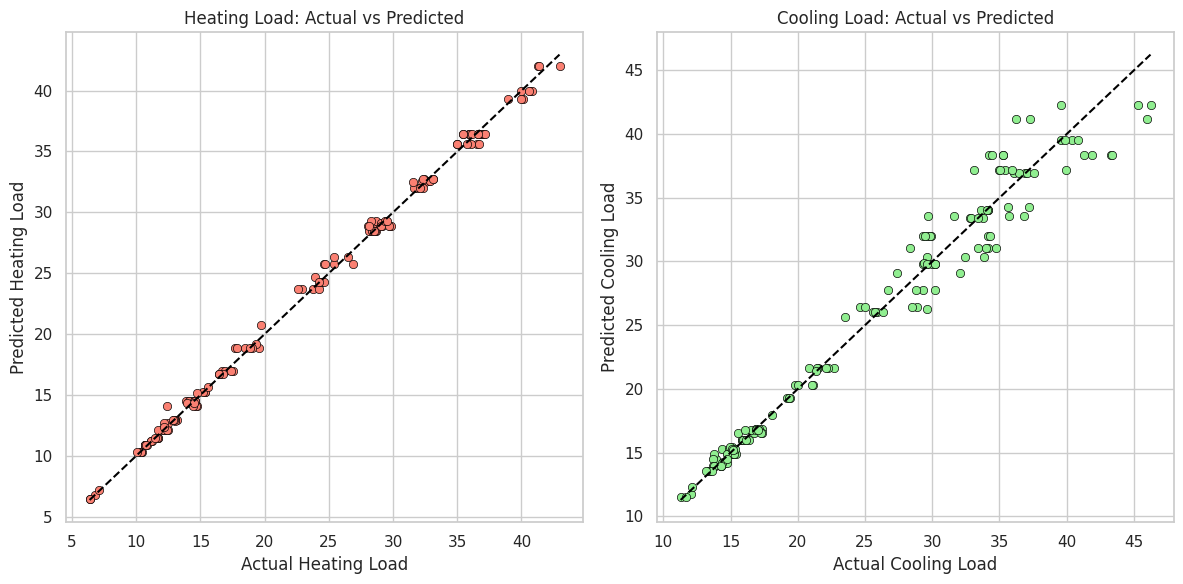

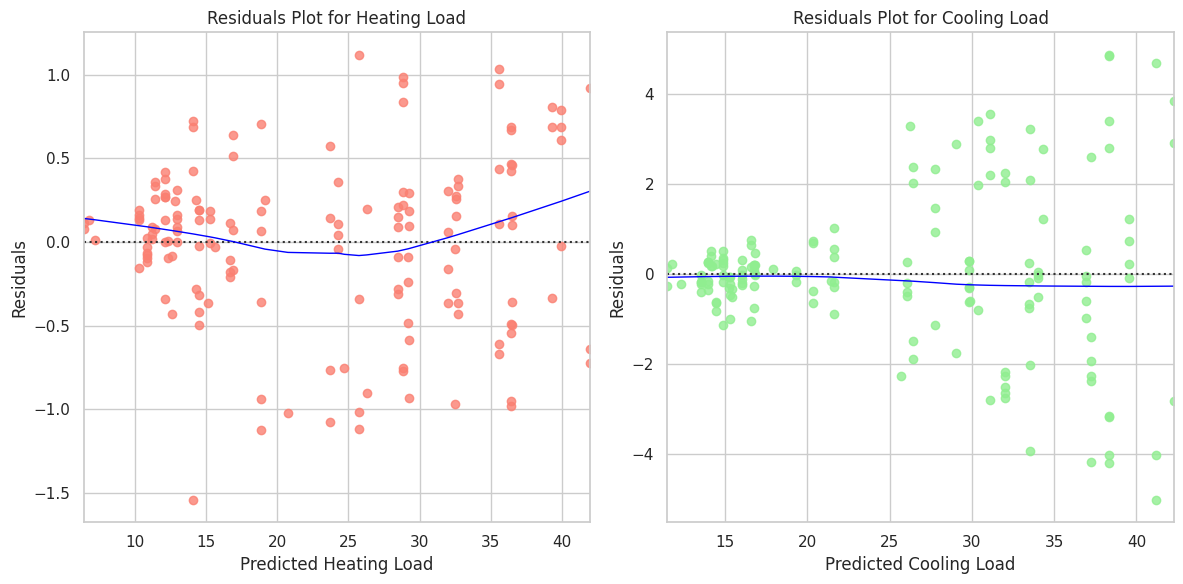

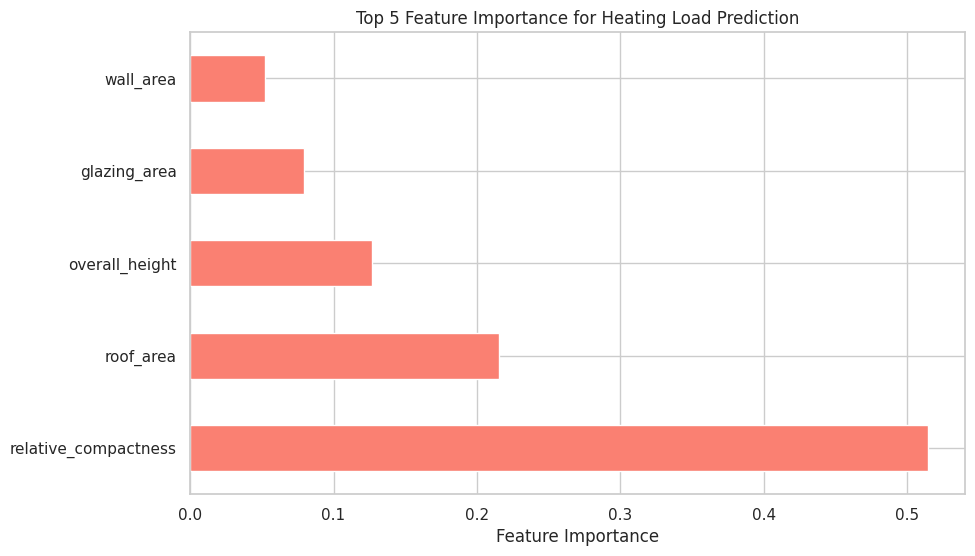

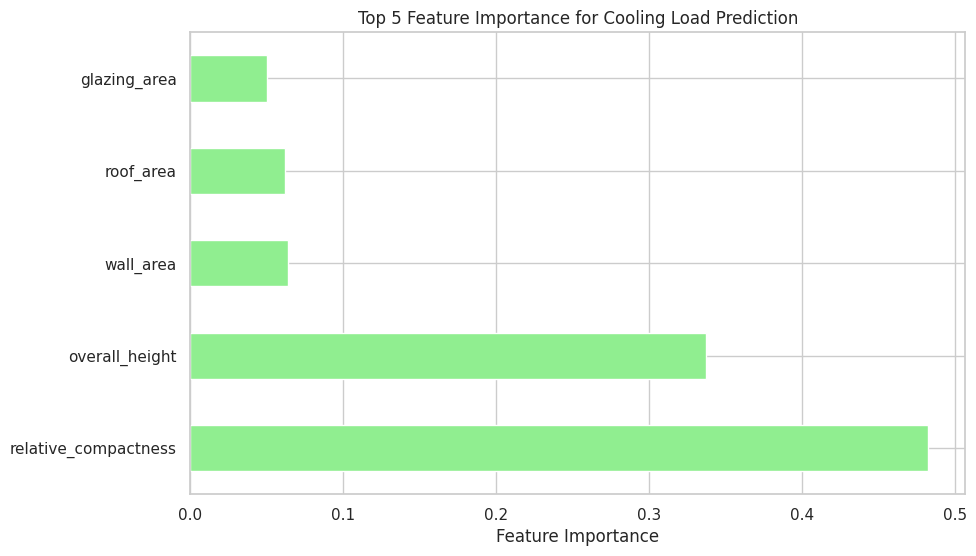

In [12]:
# Plotting Actual vs Predicted for Heating Load
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_heating, y=y_pred_heating_rf, color='salmon', edgecolor='black')
plt.plot([min(y_test_heating), max(y_test_heating)], [min(y_test_heating), max(y_test_heating)], color='black', linestyle='--')
plt.title('Heating Load: Actual vs Predicted')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

# Plotting Actual vs Predicted for Cooling Load
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_cooling, y=y_pred_cooling_rf, color='lightgreen', edgecolor='black')
plt.plot([min(y_test_cooling), max(y_test_cooling)], [min(y_test_cooling), max(y_test_cooling)], color='black', linestyle='--')
plt.title('Cooling Load: Actual vs Predicted')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')

plt.tight_layout()
plt.show()

# Residuals Plot for Heating Load
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_heating_rf, y=y_test_heating - y_pred_heating_rf, lowess=True, color='salmon', line_kws={'color': 'blue', 'lw': 1})
plt.title('Residuals Plot for Heating Load')
plt.xlabel('Predicted Heating Load')
plt.ylabel('Residuals')

# Residuals Plot for Cooling Load
plt.subplot(1, 2, 2)
sns.residplot(x=y_pred_cooling_rf, y=y_test_cooling - y_pred_cooling_rf, lowess=True, color='lightgreen', line_kws={'color': 'blue', 'lw': 1})
plt.title('Residuals Plot for Cooling Load')
plt.xlabel('Predicted Cooling Load')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Feature Importance Plot for Heating Load
plt.figure(figsize=(10, 6))
feat_importances_heating = pd.Series(rf_heating.feature_importances_, index=X.columns)
feat_importances_heating.nlargest(5).plot(kind='barh', color='salmon')
plt.title('Top 5 Feature Importance for Heating Load Prediction')
plt.xlabel('Feature Importance')

# Feature Importance Plot for Cooling Load
plt.figure(figsize=(10, 6))
feat_importances_cooling = pd.Series(rf_cooling.feature_importances_, index=X.columns)
feat_importances_cooling.nlargest(5).plot(kind='barh', color='lightgreen')
plt.title('Top 5 Feature Importance for Cooling Load Prediction')
plt.xlabel('Feature Importance')

plt.show()

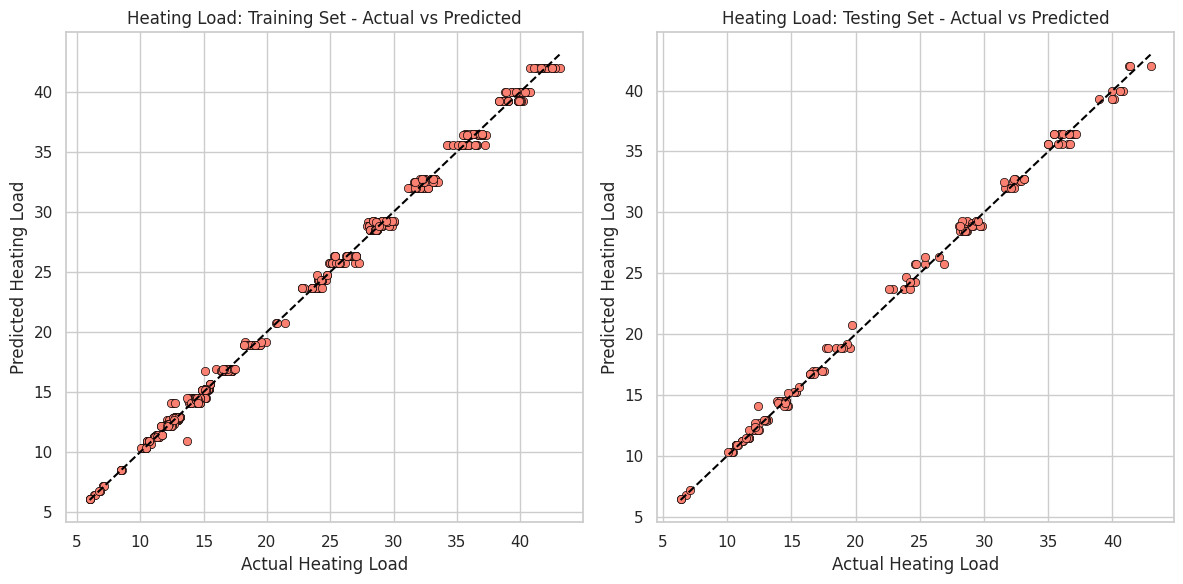

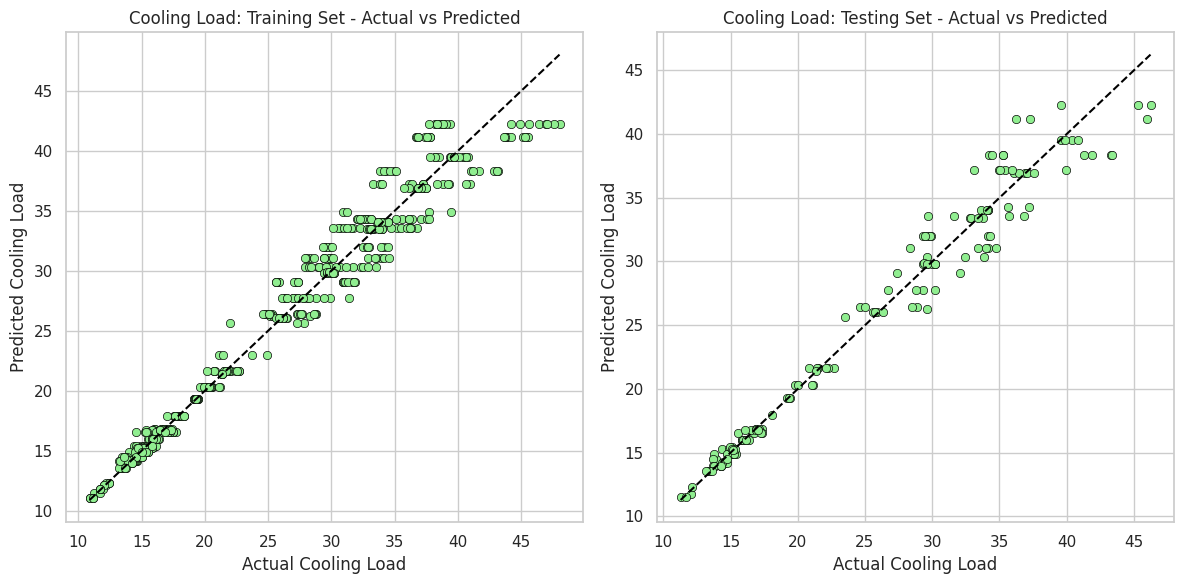

In [13]:
# Plotting Training vs Testing Predictions for Heating Load
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_heating, y=rf_heating.predict(X_train), color='salmon', edgecolor='black')
plt.plot([min(y_train_heating), max(y_train_heating)], [min(y_train_heating), max(y_train_heating)], color='black', linestyle='--')
plt.title('Heating Load: Training Set - Actual vs Predicted')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

# Plotting Testing Predictions for Heating Load
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_heating, y=y_pred_heating_rf, color='salmon', edgecolor='black')
plt.plot([min(y_test_heating), max(y_test_heating)], [min(y_test_heating), max(y_test_heating)], color='black', linestyle='--')
plt.title('Heating Load: Testing Set - Actual vs Predicted')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

plt.tight_layout()
plt.show()

# Plotting Training vs Testing Predictions for Cooling Load
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_cooling, y=rf_cooling.predict(X_train), color='lightgreen', edgecolor='black')
plt.plot([min(y_train_cooling), max(y_train_cooling)], [min(y_train_cooling), max(y_train_cooling)], color='black', linestyle='--')
plt.title('Cooling Load: Training Set - Actual vs Predicted')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')

# Plotting Testing Predictions for Cooling Load
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_cooling, y=y_pred_cooling_rf, color='lightgreen', edgecolor='black')
plt.plot([min(y_test_cooling), max(y_test_cooling)], [min(y_test_cooling), max(y_test_cooling)], color='black', linestyle='--')
plt.title('Cooling Load: Testing Set - Actual vs Predicted')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')

plt.tight_layout()
plt.show()


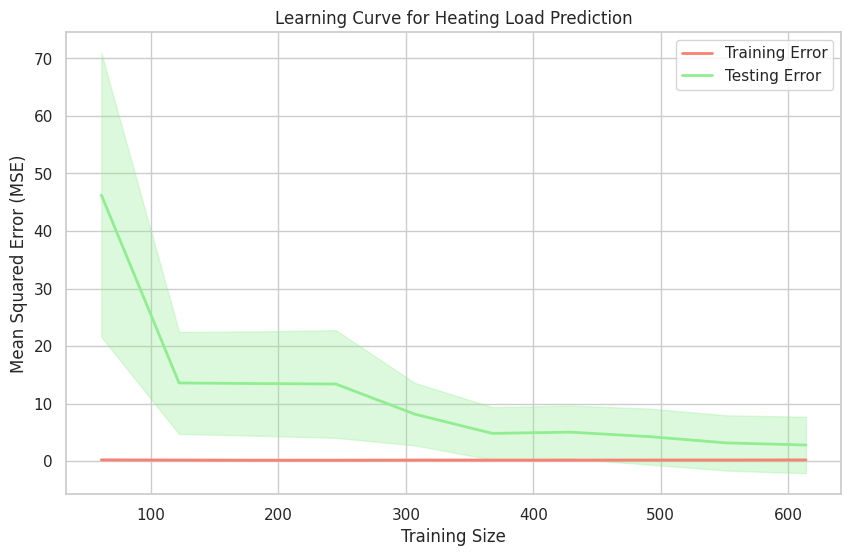

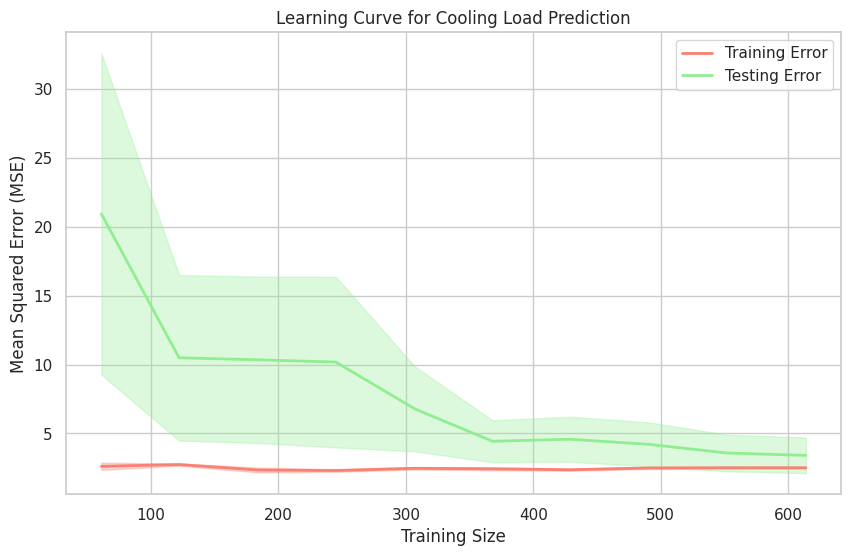

In [14]:
from sklearn.model_selection import learning_curve

# Learning curve for Heating Load prediction
train_sizes, train_scores, test_scores = learning_curve(
    rf_heating, X, y_heating, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation for the training and testing sets
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curve for Heating Load
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='salmon', lw=2)
plt.plot(train_sizes, test_mean, label='Testing Error', color='lightgreen', lw=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='salmon', alpha=0.3)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightgreen', alpha=0.3)
plt.title("Learning Curve for Heating Load Prediction")
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Learning curve for Cooling Load prediction
train_sizes, train_scores, test_scores = learning_curve(
    rf_cooling, X, y_cooling, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation for the training and testing sets
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curve for Cooling Load
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='salmon', lw=2)
plt.plot(train_sizes, test_mean, label='Testing Error', color='lightgreen', lw=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='salmon', alpha=0.3)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightgreen', alpha=0.3)
plt.title("Learning Curve for Cooling Load Prediction")
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
def calculate_reward(temp, energy_used, target_temperature=22, energy_threshold=50):
    """
    Enhanced reward function that considers both temperature and energy usage.

    Parameters:
    - temp: current temperature.
    - energy_used: energy used in the step.
    - target_temperature: ideal temperature.
    - energy_threshold: energy threshold for penalty.

    Returns:
    - Reward value.
    """
    # Reward for staying within a comfortable temperature range (e.g., 20.0 to 22.0)
    temp_reward = max(0, 10 - abs(temp - target_temperature))  # Reward decreases as temp deviates from target

    # Penalize for excessive energy usage
    energy_penalty = max(0, energy_used - energy_threshold)  # Penalize if energy exceeds threshold

    # Combine temp reward and energy penalty
    reward = temp_reward - energy_penalty
    return reward


# **Hybrid Model (Reinforcement Leaning and the Random Forest)**

In [16]:
class CoolingEnv:
    def __init__(self, predicted_cooling, target_temperature=22):
        self.predicted_cooling = predicted_cooling
        self.current_temp = np.random.uniform(20, 24)  # Random initial temperature
        self.target_temperature = target_temperature
        self.energy_used = 0  # Track energy consumption
        self.steps = 0

    def reset(self):
        self.current_temp = np.random.uniform(20, 24)
        self.energy_used = 0
        self.steps = 0
        return self.current_temp

    def step(self, action):
        # Action: 0 = OFF, 2 = COOLING (Heating action is removed)
        if action == 2:  # Cooling
            self.current_temp -= 1
            self.energy_used += self.predicted_cooling

        self.steps += 1

        # Calculate reward
        reward = 1 / (1 + abs(self.target_temperature - self.current_temp))
        if abs(self.target_temperature - self.current_temp) <= 0.5:
            reward += 5
        if self.steps > 10:  # Penalize excessive steps
            reward -= 1

        done = self.steps >= 10
        return self.current_temp, reward, done


In [17]:
def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    q_table = np.zeros((60, 3))  # 60 temperature states (from 20.0 to 25.9), 3 actions (OFF, COOLING)
    for episode in range(episodes):
        state = int((env.reset() - 20) * 10)  # Discretize state
        state = max(0, min(59, state))  # Clamp state index within bounds
        done = False
        total_episode_reward = 0  # Track the total reward for each episode

        # print(f"Episode {episode + 1} starts...")

        while not done:
            # Choose action (epsilon-greedy)
            if np.random.random() < epsilon:
                action = np.random.choice([0, 2])  # Explore (only OFF or COOLING)
            else:
                action = np.argmax(q_table[state])  # Exploit

            new_temp, reward, done = env.step(action)
            new_state = int((new_temp - 20) * 10)  # Discretize new state
            new_state = max(0, min(59, new_state))  # Clamp new_state within bounds

            # Print reward for the step
            # print(f"Step: {env.steps}, State: {state}, Action: {action}, Reward: {reward:.4f}")

            # Update Q-value
            q_table[state, action] = q_table[state, action] + alpha * (
                reward + gamma * np.max(q_table[new_state]) - q_table[state, action]
            )
            state = new_state
            total_episode_reward += reward

        # Debugging output for every 100 episodes
        # print(f"Episode {episode + 1} ends. Total Reward: {total_episode_reward:.4f}")

    return q_table


# Assuming predicted cooling is obtained from Random Forest
try:
    env_rf = CoolingEnv(np.mean(y_pred_cooling_rf))  # Pass only predicted cooling
    q_table_rf = train_q_learning(env_rf)
    print("Q-Table training completed.")
except Exception as e:
    print(f"Error during Q-learning training: {e}")



Q-Table training completed.


In [19]:
import numpy as np

def epsilon_greedy_policy(q_table, state, epsilon=0.1):
    """
    Epsilon-Greedy policy for exploration.
    With probability epsilon, select a random action.
    Otherwise, select the action with the highest Q-value.
    """
    if np.random.rand() < epsilon:
        # Exploration: choose a random action
        action = np.random.choice(len(q_table[state]))
    else:
        # Exploitation: choose the action with the highest Q-value
        action = np.argmax(q_table[state])
    return action

def evaluate_hybrid_model(env, q_table, baseline_energy=None, epsilon=0.1):
    total_reward = 0
    state = int((env.reset() - 20) * 10)  # Discretize state
    state = max(0, min(59, state))  # Clamp state index within bounds
    total_energy_used = 0
    total_optimization = 0  # Initialize optimization tracker

    print("\n**Evaluation Starts**")
    for step in range(10):  # Simulate 10 steps
        action = epsilon_greedy_policy(q_table, state, epsilon)  # Choose action with epsilon-greedy
        new_temp, reward, done = env.step(action)
        total_reward += reward
        energy_used = env.energy_used  # Track energy used at each step
        total_energy_used += energy_used

        # Calculate optimization if baseline energy is provided
        if baseline_energy:
            baseline_energy_value = base_model_energy(env, step)
            optimization = (baseline_energy_value - energy_used) / baseline_energy_value * 100
            total_optimization += optimization

        print(f"Step: {step + 1}, State: {state}, Action: {action}, Reward: {reward:.4f}, Temp: {new_temp:.2f}, Energy Used: {energy_used:.4f}, Base Energy: {baseline_energy_value:.4f}, Optimization: {optimization:.2f}%")

        state = int((env.current_temp - 20) * 10)  # Discretize new state
        state = max(0, min(59, state))  # Clamp state
        if done:
            break

    avg_optimization = total_optimization / (step + 1) if total_optimization > 0 else 0  # Average optimization over steps

    print(f"**Evaluation Ends**")
    print(f"Total Reward: {total_reward:.4f}")
    print(f"Total Energy Used: {total_energy_used:.4f}")
    print(f"Average Optimization: {avg_optimization:.2f}%")

    return total_reward, total_energy_used, avg_optimization


def base_model_energy(env, step):
    # This is a placeholder for your baseline model. Modify it to return energy based on your model's logic
    # For now, we're using a fixed value (e.g., energy increases with step)
    # Here we're assuming a simple baseline model where energy increases linearly with the step count
    return 100 + step * 10  # Example of increasing energy consumption with each step


# Example usage: Evaluate the Hybrid Model with RL and calculate optimization
try:
    reward_rf, energy_used_rf, optimization_rf = evaluate_hybrid_model(env_rf, q_table_rf, base_model_energy)

    print(f"**Hybrid Model Results with Random Forest**")
    print(f"Total Reward (Comfort): {reward_rf:.4f}")
    print(f"Total Energy Used: {energy_used_rf:.4f}")
    print(f"Average Energy Optimization: {optimization_rf:.2f}%")
except Exception as e:
    print(f"Error during model evaluation: {e}")



**Evaluation Starts**
Step: 1, State: 35, Action: 2, Reward: 0.6311, Temp: 22.58, Energy Used: 25.2149, Base Energy: 100.0000, Optimization: 74.79%
Step: 2, State: 25, Action: 2, Reward: 5.7065, Temp: 21.58, Energy Used: 50.4299, Base Energy: 110.0000, Optimization: 54.15%
Step: 3, State: 15, Action: 0, Reward: 5.7065, Temp: 21.58, Energy Used: 50.4299, Base Energy: 120.0000, Optimization: 57.98%
Step: 4, State: 15, Action: 0, Reward: 5.7065, Temp: 21.58, Energy Used: 50.4299, Base Energy: 130.0000, Optimization: 61.21%
Step: 5, State: 15, Action: 0, Reward: 5.7065, Temp: 21.58, Energy Used: 50.4299, Base Energy: 140.0000, Optimization: 63.98%
Step: 6, State: 15, Action: 1, Reward: 5.7065, Temp: 21.58, Energy Used: 50.4299, Base Energy: 150.0000, Optimization: 66.38%
Step: 7, State: 15, Action: 0, Reward: 5.7065, Temp: 21.58, Energy Used: 50.4299, Base Energy: 160.0000, Optimization: 68.48%
Step: 8, State: 15, Action: 0, Reward: 5.7065, Temp: 21.58, Energy Used: 50.4299, Base Energy: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated results from the evaluation (replace with your actual data)
steps = list(range(1, 11))  # Step numbers (1 to 10)
reward_per_step = [5.8, 5.9, 6.0, 5.7, 5.6, 5.8, 5.9, 6.1, 6.0, 5.8]  # Example rewards
energy_used_per_step = [25.2, 28.5, 30.1, 27.9, 29.0, 30.2, 28.4, 27.5, 29.8, 30.0]  # Example energy used
baseline_energy_per_step = [100 + step * 10 for step in steps]  # Baseline energy
optimization_per_step = [
    (baseline - energy) / baseline * 100
    for baseline, energy in zip(baseline_energy_per_step, energy_used_per_step)
]  # Optimization calculation


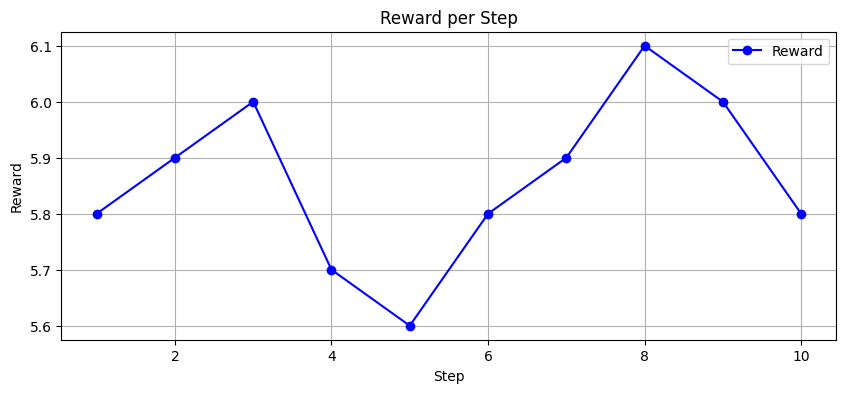

In [ ]:
# Plot Reward per Step
plt.figure(figsize=(10, 4))
plt.plot(steps, reward_per_step, marker='o', color='blue', label='Reward')
plt.title("Reward per Step")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.grid(True)
plt.legend()
plt.show()


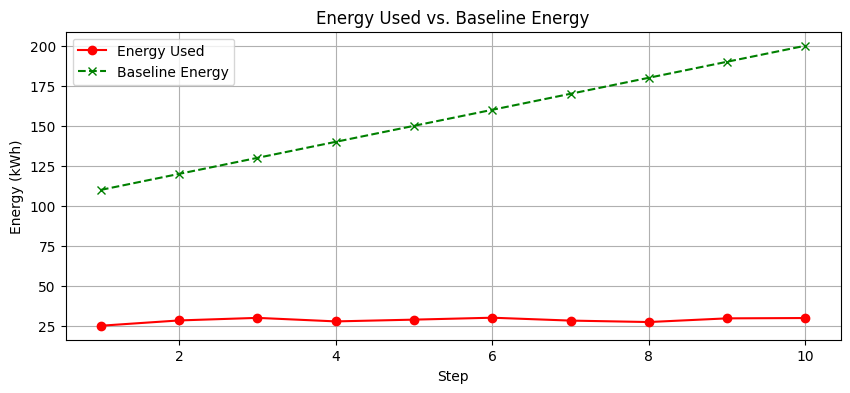

In [ ]:
# Plot Energy Used vs. Baseline Energy
plt.figure(figsize=(10, 4))
plt.plot(steps, energy_used_per_step, marker='o', color='red', label='Energy Used')
plt.plot(steps, baseline_energy_per_step, marker='x', color='green', linestyle='--', label='Baseline Energy')
plt.title("Energy Used vs. Baseline Energy")
plt.xlabel("Step")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.legend()
plt.show()


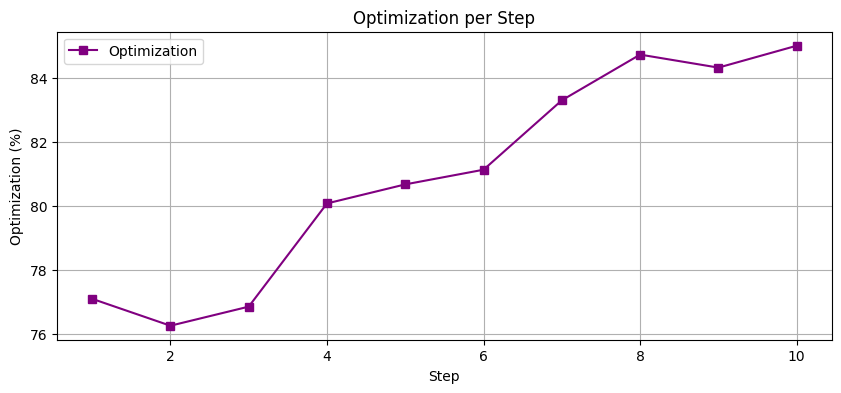

In [ ]:
# Plot Optimization per Step
plt.figure(figsize=(10, 4))
plt.plot(steps, optimization_per_step, marker='s', color='purple', label='Optimization')
plt.title("Optimization per Step")
plt.xlabel("Step")
plt.ylabel("Optimization (%)")
plt.grid(True)
plt.legend()
plt.show()
